# Data Loading

In [ ]:
#prod
#Imports and Installs, uncomment the install for first run
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [ ]:
#prod
#Data stored in Google Drive, must authenticate to pull data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#prod
#01_M02_DC_train
#https://drive.google.com/file/d/1DO8bKxsTZe8gQ_zNnf6X1-9xlsWw37y2/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1DO8bKxsTZe8gQ_zNnf6X1-9xlsWw37y2'})
fileDownloaded.GetContentFile('01_M02_DC_train.csv')

#01_M02_train_fault_data
#https://drive.google.com/file/d/1dppx60e2tdu4nm2XvZ1lRlMVPnVI4cvV/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1dppx60e2tdu4nm2XvZ1lRlMVPnVI4cvV'})
fileDownloaded.GetContentFile('01_M02_train_fault_data.csv')

#01_M02_DC_train_ttf
#https://drive.google.com/file/d/1xBhlyjDhO1t_jXJLsKxP-SXD0XhKtmAU/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1xBhlyjDhO1t_jXJLsKxP-SXD0XhKtmAU'})
fileDownloaded.GetContentFile('01_M02_DC_train_ttf.csv')

#loading into CSVs
df_train = pd.read_csv('01_M02_DC_train.csv', delimiter=',')
df_train.set_index('time')

df_fault = pd.read_csv('01_M02_train_fault_data.csv', delimiter=',')
df_fault.set_index('time')

df_ttf = pd.read_csv('01_M02_DC_train_ttf.csv', delimiter=',')
df_ttf.set_index('time')


# #03_M02_DC_train
# #https://drive.google.com/file/d/1Mho3WwCHX5JUo5IZwibV5MNBvJr_ZRhJ/view?usp=share_link
# fileDownloaded = drive.CreateFile({'id':'1Mho3WwCHX5JUo5IZwibV5MNBvJr_ZRhJ'})
# fileDownloaded.GetContentFile('03_M02_DC_train.csv')

# #03_M02_train_fault_data
# #https://drive.google.com/file/d/1-uZaGxkZBF-wrg5mBIL1WIL187Bc_cUt/view?usp=sharing
# fileDownloaded = drive.CreateFile({'id':'1-uZaGxkZBF-wrg5mBIL1WIL187Bc_cUt'})
# fileDownloaded.GetContentFile('03_M02_train_fault_data.csv')

# #03_M02_DC_train_ttf
# #https://drive.google.com/file/d/1IpBcjBap0LCVqKLb2Uwk3biTuXlpB4qF/view?usp=sharing
# fileDownloaded = drive.CreateFile({'id':'1IpBcjBap0LCVqKLb2Uwk3biTuXlpB4qF'})
# fileDownloaded.GetContentFile('03_M02_DC_train_ttf.csv')

# #loading into CSVs
# df_train = pd.read_csv('03_M02_DC_train.csv', delimiter=',')
# df_train.set_index('time')

# df_fault = pd.read_csv('03_M02_train_fault_data.csv', delimiter=',')
# df_fault.set_index('time')

# df_ttf = pd.read_csv('03_M02_DC_train_ttf.csv', delimiter=',')
# df_ttf.set_index('time')

,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
time,,,
3283834,623234.0,9146470.0,632514.0
3283838,623230.0,9146466.0,632510.0
3283842,623226.0,9146462.0,632506.0
3283846,623222.0,9146458.0,632502.0
3283850,623218.0,9146454.0,632498.0
...,...,...,...
39789824,NaN,NaN,NaN
39789828,NaN,NaN,NaN
39789832,NaN,NaN,NaN


# Preprocessing

In [ ]:
#prod
#Make sure the TTFs are all divisible by 4, and subtract mod 4 if not
df_ttf['TTF_FlowCool Pressure Dropped Below Limit'] = df_ttf['TTF_FlowCool Pressure Dropped Below Limit'].sub(df_ttf['TTF_FlowCool Pressure Dropped Below Limit'] % 4)
df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'] = df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'].sub(df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'] % 4)
df_ttf['TTF_Flowcool leak'] = df_ttf['TTF_Flowcool leak'].sub(df_ttf['TTF_Flowcool leak'] % 4)

#set failure time to mod 4 as well so the time index matches other datasets
df_fault['time'] = df_fault['time'].sub(df_fault['time'] % 4)

# #sanity check
# print(df_ttf.loc[df_ttf['TTF_FlowCool Pressure Dropped Below Limit'].isin([1, 2, 3])])
# print(df_ttf.loc[df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'].isin([1, 2, 3])])
# print(df_ttf.loc[df_ttf['TTF_Flowcool leak'].isin([1, 2, 3])])

#join the ttf and training data together on time
df = pd.concat([df_train, df_ttf], axis=1, join = 'inner')
df.columns = ['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step','IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT','ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK','FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE','FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER','ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION', 'time_drop','TTF_FlowCool Pressure Dropped Below Limit','TTF_Flowcool Pressure Too High Check Flowcool Pump','TTF_Flowcool leak']
#drop excess "time" column by position
df = df.drop(df.columns[24],axis = 1)

#FSP of 1 is the only important data
#df = df.loc[df['FIXTURESHUTTERPOSITION'] == 1]
#drop NaNs that are present at the end of ttf (no more failures)
df = df.dropna(subset=['TTF_FlowCool Pressure Dropped Below Limit','TTF_Flowcool Pressure Too High Check Flowcool Pump', 'TTF_Flowcool leak'], how='all')
#drop duplicates ignoring the time and TTF columns
df.drop_duplicates(subset=df.columns.difference(['time', 'TTF_FlowCool Pressure Dropped Below Limit', 'TTF_Flowcool Pressure Too High Check Flowcool Pump',	'TTF_Flowcool leak']))

#Make 3 dataframes, one for each fail type
df_f1 = df.drop(['TTF_Flowcool Pressure Too High Check Flowcool Pump', 'TTF_Flowcool leak', "time", "Tool", "ROTATIONSPEED"],axis = 1)
df_f1 = df_f1.dropna()
df_f2 = df.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'TTF_Flowcool leak', "time", "Tool", "ROTATIONSPEED"],axis = 1)
df_f2 = df_f2.dropna()
df_f3 = df.drop(['TTF_FlowCool Pressure Dropped Below Limit', 'TTF_Flowcool Pressure Too High Check Flowcool Pump', "time", "Tool", "ROTATIONSPEED"],axis = 1)
df_f3 = df_f3.dropna()

#stage, recipe, and recipe step are categorical and need to be encoded as such, but adds complexity. Wu dropped them. include OHE in Proprocess_data function

In [ ]:
df_f3['TTF_Flowcool leak'].min()

0.0

In [ ]:
df['TTF_Flowcool leak'].min()

0.0

In [ ]:
#prod
def PreProcess_Data(df_f1, df_f2, df_f3, numKept, numFail):
    #only keep the data within 6000 seconds of a failure  to closer analyze the data
    df_f1 = df_f1.loc[df['TTF_FlowCool Pressure Dropped Below Limit'] < numKept]
    df_f2 = df_f2.loc[df['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numKept]
    df_f3 = df_f3.loc[df['TTF_Flowcool leak'] < numKept]

    # df_f1['IsFailure'] = np.where(df_f1['TTF_FlowCool Pressure Dropped Below Limit'] < numFail, True, False)
    # df_f2['IsFailure'] = np.where(df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numFail, True, False)
    # df_f3['IsFailure'] = np.where(df_f3['TTF_Flowcool leak'] < numFail, True, False)
    df_f1.loc[df_f1['TTF_FlowCool Pressure Dropped Below Limit'] < numFail, 'IsFailure'] = 1
    df_f1.loc[df_f1['TTF_FlowCool Pressure Dropped Below Limit'] >= numFail, 'IsFailure'] = 0

    df_f2.loc[df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numFail, 'IsFailure'] = 1
    df_f2.loc[df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] >= numFail, 'IsFailure'] = 0

    df_f3.loc[df_f3['TTF_Flowcool leak'] < numFail, 'IsFailure'] = 1
    df_f3.loc[df_f3['TTF_Flowcool leak'] >= numFail, 'IsFailure'] = 0

    return df_f1, df_f2, df_f3

In [ ]:
df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 86400, 20000)

In [ ]:
df3['TTF_Flowcool leak'].min()

0.0

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#get data with 5000 points from 0 as relevant and 250 point from 0 being fail data
#df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 86400, 20000)

#drop categorical columns
df1_temp = df1[['TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure']]
df2_temp = df2[['TTF_Flowcool Pressure Too High Check Flowcool Pump', 'IsFailure']]
df3_temp = df3[['TTF_Flowcool leak', 'IsFailure']]
df1 = df1.drop(['stage', 'recipe', 'recipe_step', 'Lot', 'runnum', 'TTF_FlowCool Pressure Dropped Below Limit', 'IsFailure'], axis=1)
df2 = df2.drop(['stage', 'recipe', 'recipe_step', 'Lot', 'runnum', 'TTF_Flowcool Pressure Too High Check Flowcool Pump', 'IsFailure'], axis=1)
df3 = df3.drop(['stage', 'recipe', 'recipe_step', 'Lot', 'runnum', 'TTF_Flowcool leak', 'IsFailure'], axis=1)

#implement a standard scaler to normalize the dataset, but not scaling the target values.
scaler = StandardScaler()
# scaler.fit(df1)
# df1_scaled = scaler.transform(df1)
df1_scaled = scaler.fit_transform(df1)
df2_scaled = scaler.fit_transform(df2)
df3_scaled = scaler.fit_transform(df3)
df1_scaled = pd.DataFrame(df1_scaled, columns = df1.columns)
df2_scaled = pd.DataFrame(df2_scaled, columns = df2.columns)
df3_scaled = pd.DataFrame(df3_scaled, columns = df3.columns)

#reintroduce the target values
df1_index = pd.DataFrame(df1_temp.index.values)
df2_index = pd.DataFrame(df2_temp.index.values)
df3_index = pd.DataFrame(df3_temp.index.values)

df1_scaled = pd.concat([df1_scaled, df1_index], axis=1, join = 'inner')
df1_scaled = df1_scaled.set_index(0)
df1_scaled = pd.concat([df1_scaled, df1_temp ], axis=1, join = 'inner')

df2_scaled = pd.concat([df2_scaled, df2_index], axis=1, join = 'inner')
df2_scaled = df2_scaled.set_index(0)
df2_scaled = pd.concat([df2_scaled, df2_temp ], axis=1, join = 'inner')

df3_scaled = pd.concat([df3_scaled, df3_index], axis=1, join = 'inner')
df3_scaled = df3_scaled.set_index(0)
df3_scaled = pd.concat([df3_scaled, df3_temp ], axis=1, join = 'inner')


# EDA

In [ ]:
df1_eda = df1_scaled.reset_index()
df1_eda_vis = df1_eda.drop(['index', 'TTF_FlowCool Pressure Dropped Below Limit'], axis=1)
df1_eda_tar = df1_eda['TTF_FlowCool Pressure Dropped Below Limit']

df2_eda = df2_scaled.reset_index()
df2_eda_vis = df2_eda.drop(['index', 'TTF_Flowcool Pressure Too High Check Flowcool Pump'], axis=1)
df2_eda_tar = df2_eda['TTF_Flowcool Pressure Too High Check Flowcool Pump']

df3_eda = df3_scaled.reset_index()
df3_eda_vis = df3_eda.drop(['index', 'TTF_Flowcool leak'], axis=1)
df3_eda_tar = df3_eda['TTF_Flowcool leak']

## Density plot for Fault 1

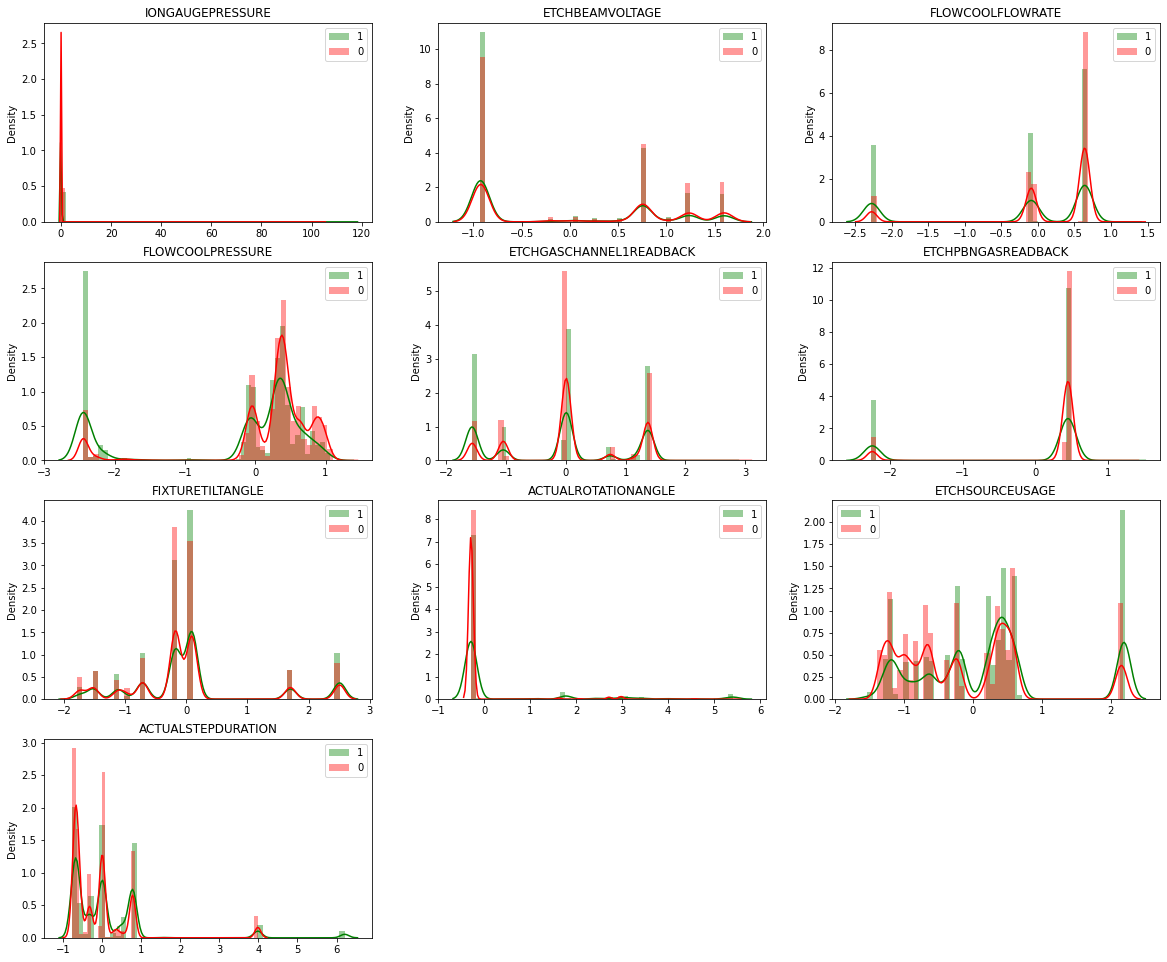

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
import seaborn as sns
#columns =df1_eda_vis.columns.drop('IsFailure')
columns = ['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'FLOWCOOLFLOWRATE',	'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK', 
           'FIXTURETILTANGLE', 'ACTUALROTATIONANGLE', 'ETCHSOURCEUSAGE', 'ACTUALSTEPDURATION']
grid = gridspec.GridSpec(7, 3)

plt.figure(figsize=(20,30))

for n, col in enumerate(df1_eda_vis[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df1_eda_vis[df1_eda_vis.IsFailure==1][col], bins = 50, color='g', label = '1')
    sns.distplot(df1_eda_vis[df1_eda_vis.IsFailure==0][col], bins = 50, color='r', label = '0') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    ax.legend()
    
plt.show()

## Density Plot for Fault 2

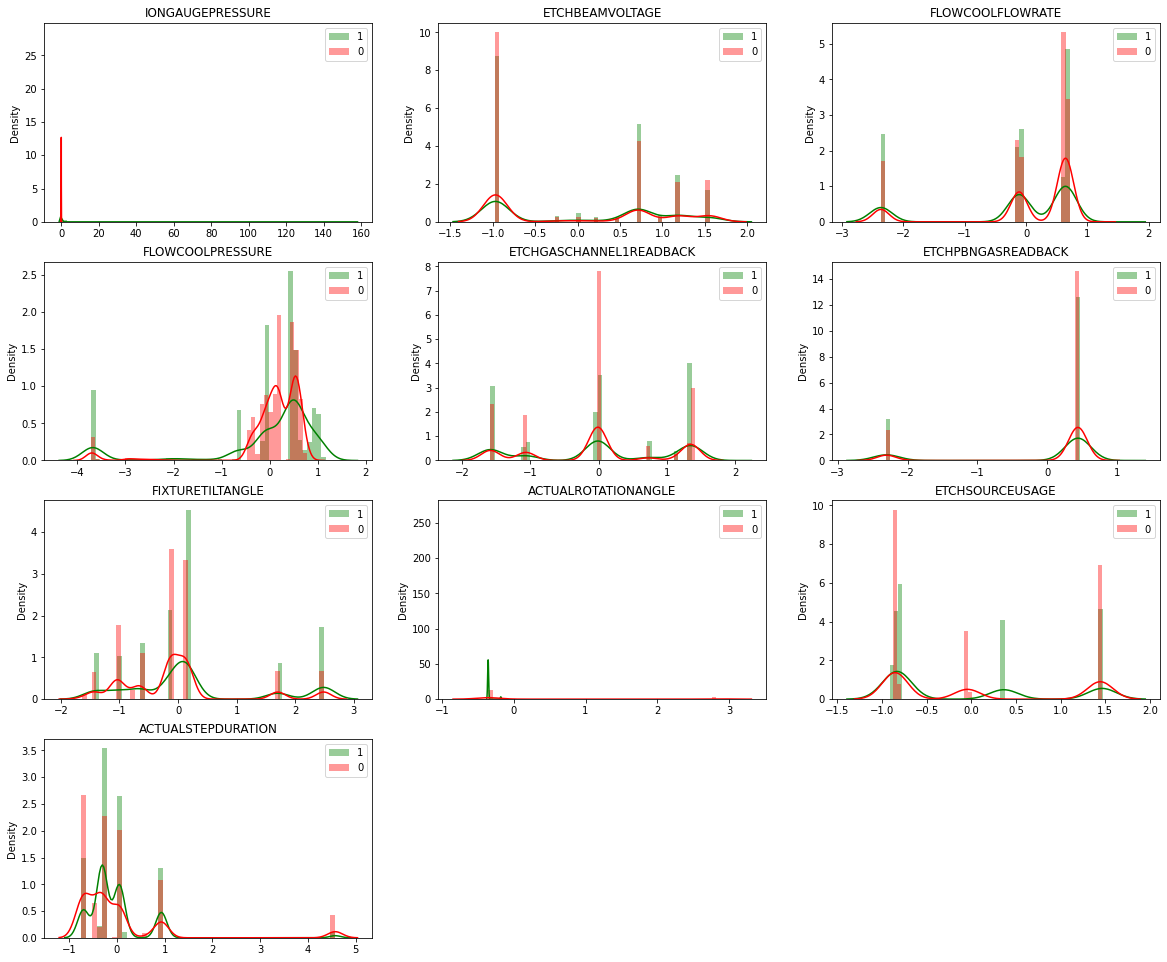

In [ ]:
#columns =df2_eda_vis.columns.drop('IsFailure')
grid = gridspec.GridSpec(7, 3)

plt.figure(figsize=(20,30))

for n, col in enumerate(df2_eda_vis[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df2_eda_vis[df2_eda_vis.IsFailure==1][col], bins = 50, color='g', label ='1')
    sns.distplot(df2_eda_vis[df2_eda_vis.IsFailure==0][col], bins = 50, color='r', label ='0') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    ax.legend()
    
plt.show()

## Density Plot for Fault 3

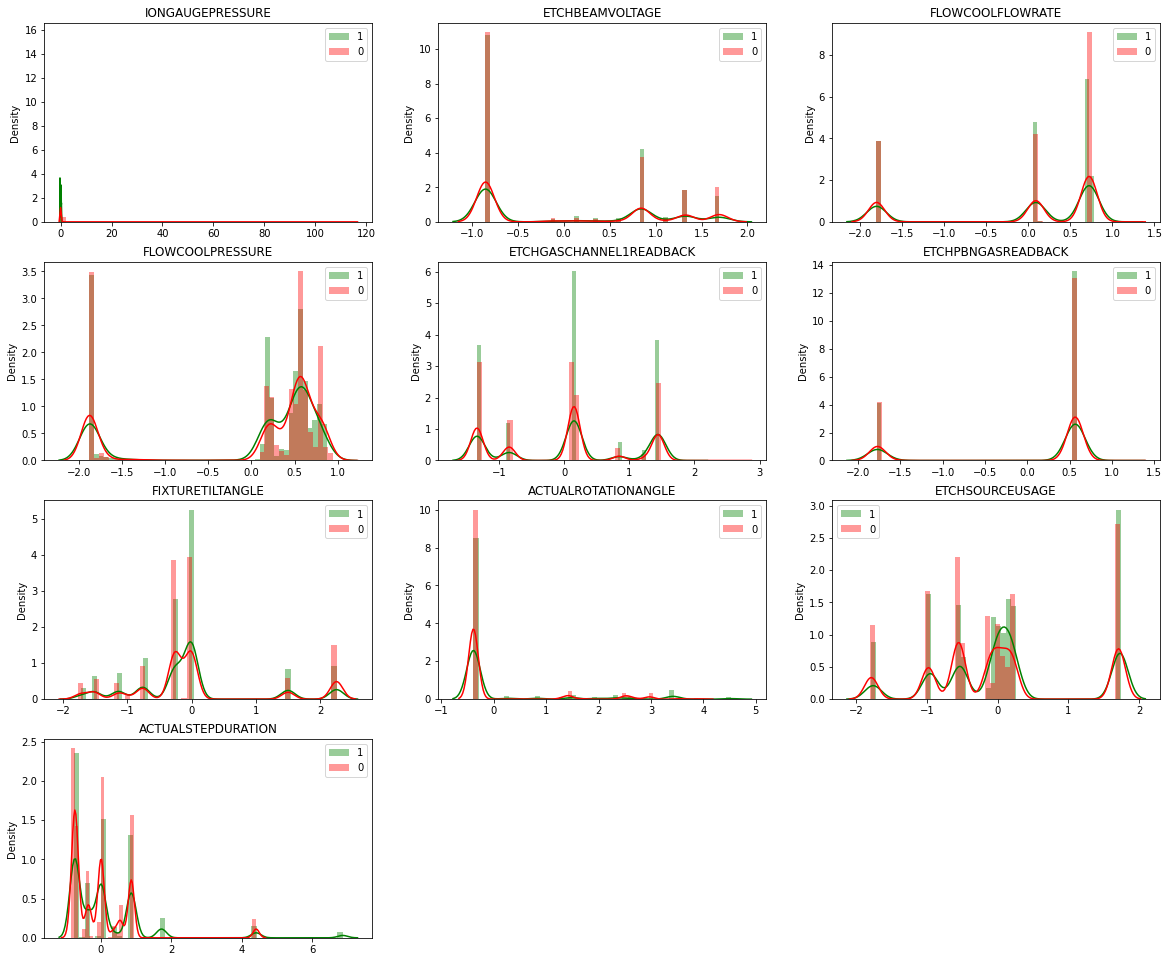

In [ ]:
#columns =df3_eda_vis.columns.drop('IsFailure')

grid = gridspec.GridSpec(7, 3)

plt.figure(figsize=(20,30))

for n, col in enumerate(df3_eda_vis[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df3_eda_vis[df3_eda_vis.IsFailure==1][col], bins = 50, color='g', label='1')
    sns.distplot(df3_eda_vis[df3_eda_vis.IsFailure==0][col], bins = 50, color='r', label='0') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    ax.legend()
    
plt.show()

## Line Plots for Fault 1

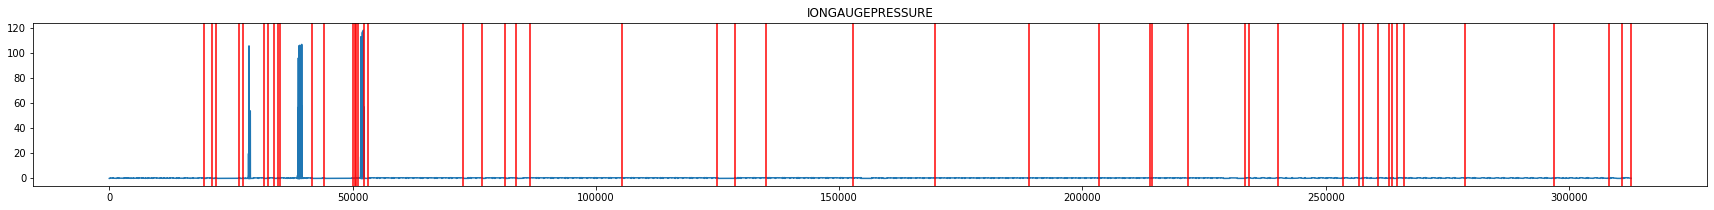

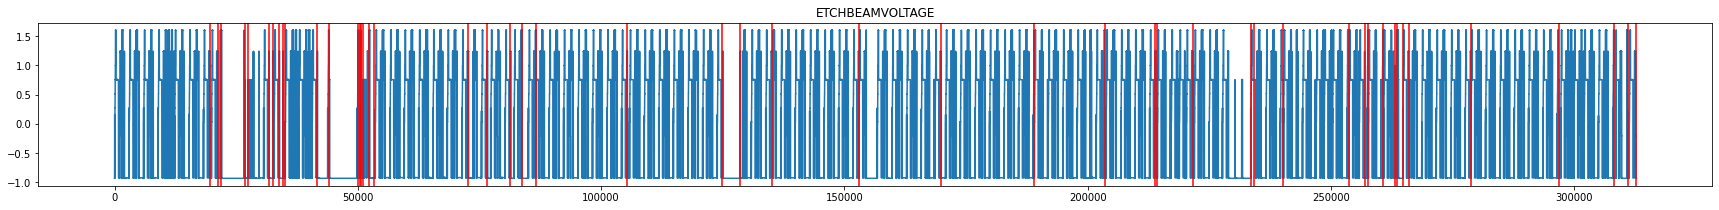

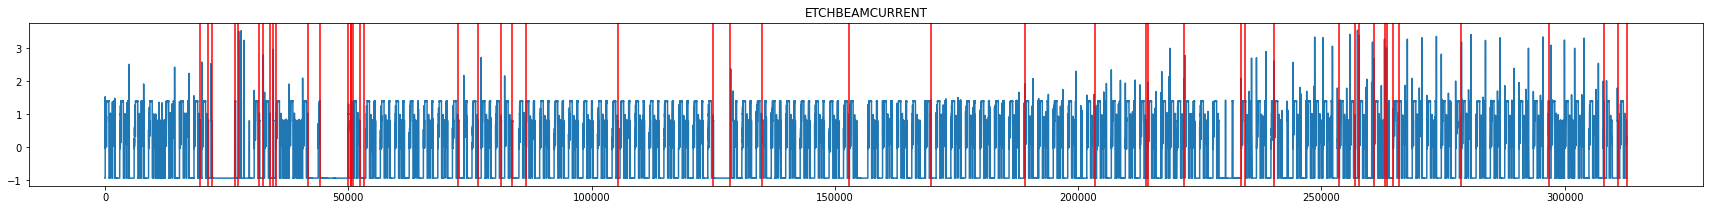

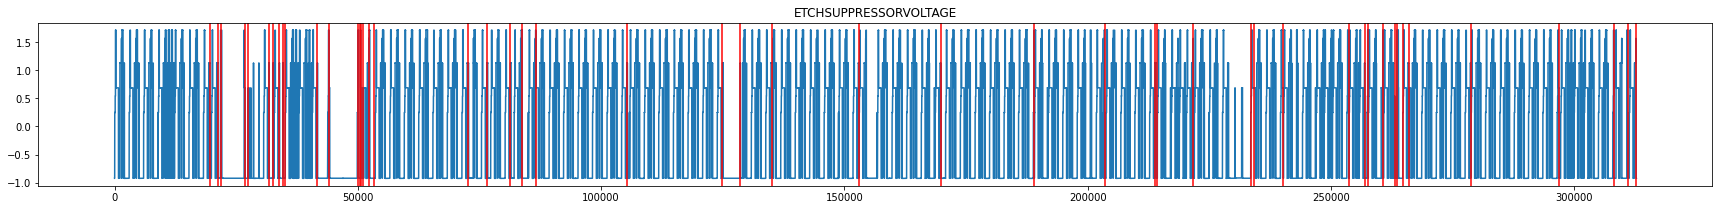

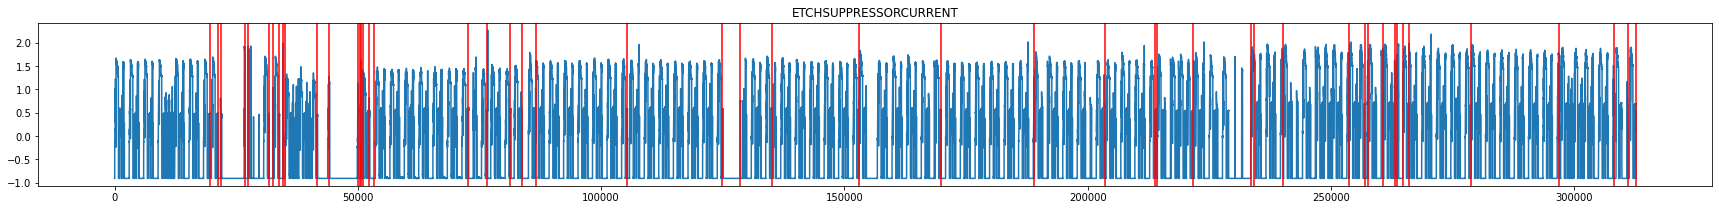

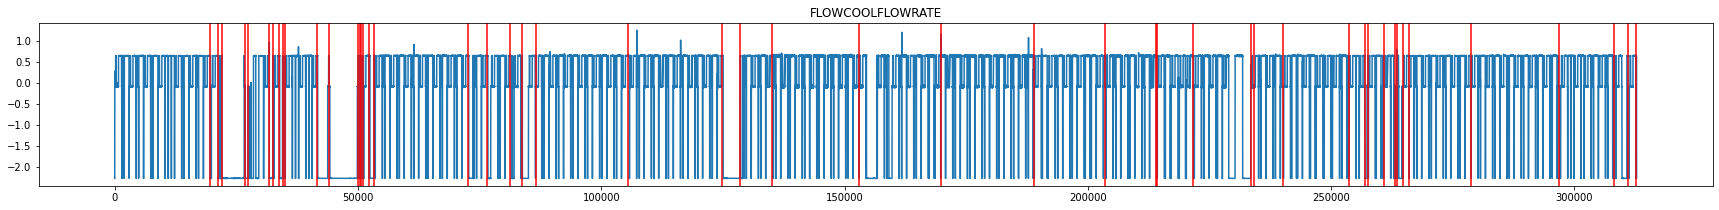

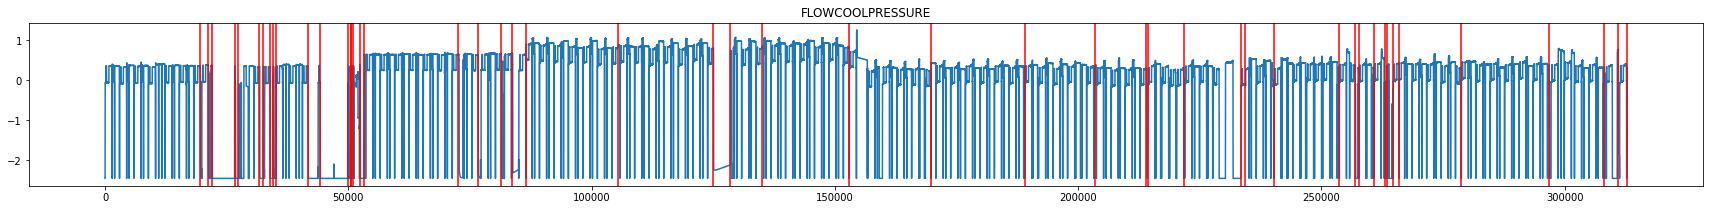

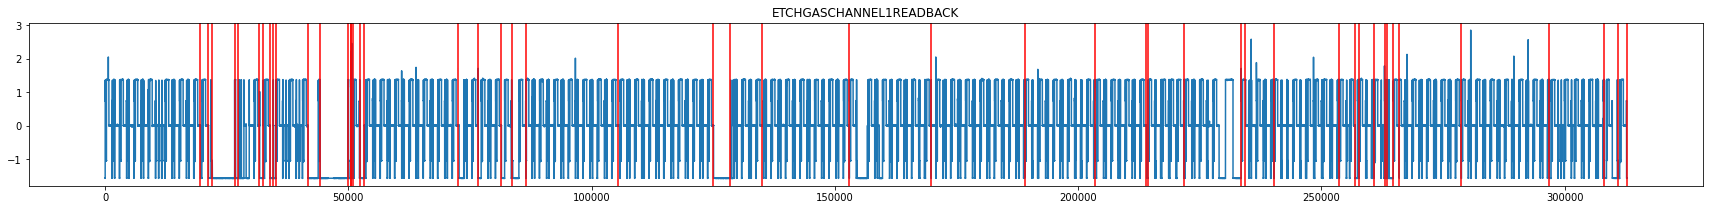

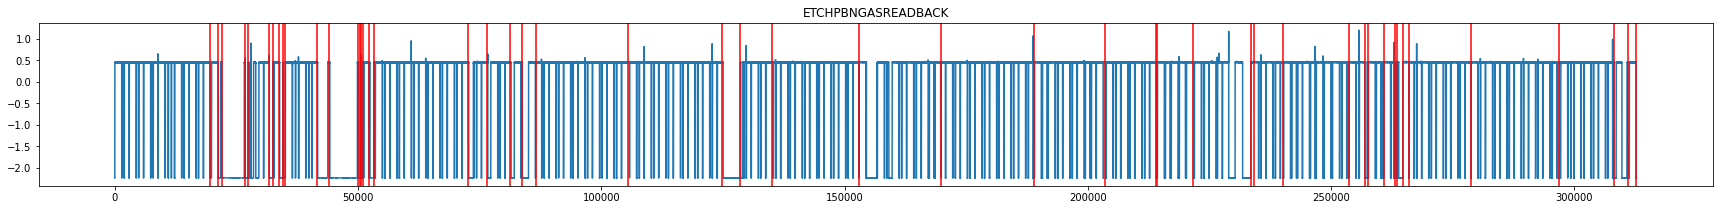

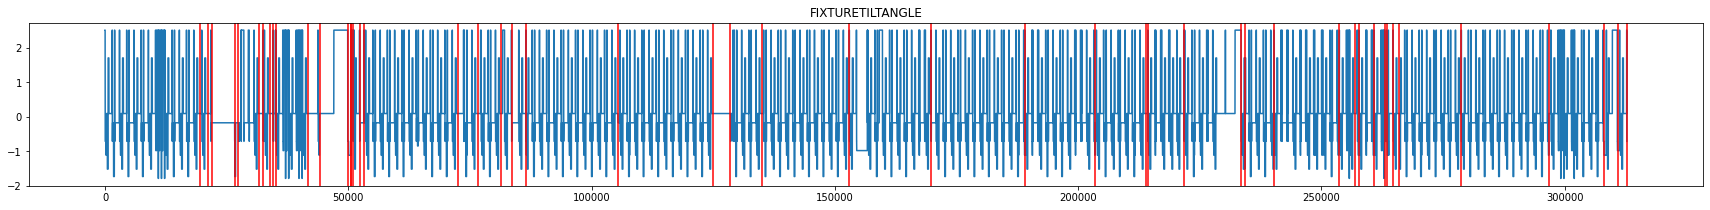

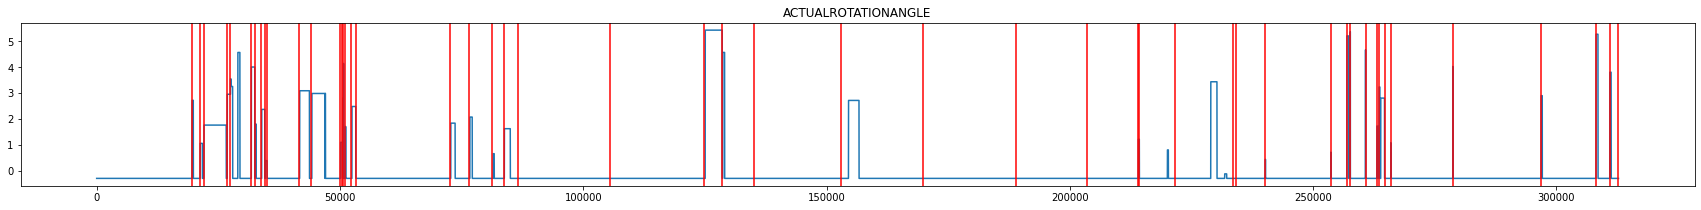

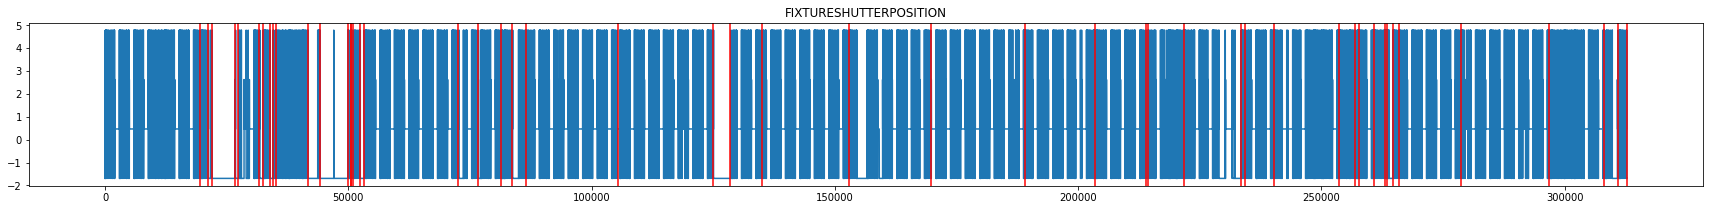

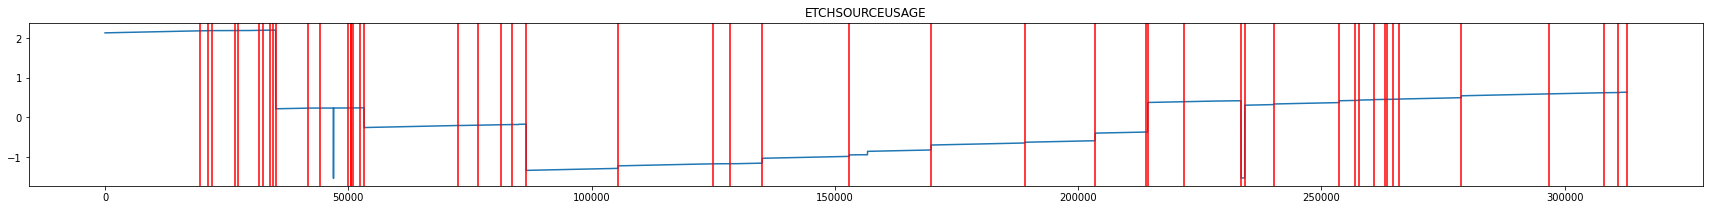

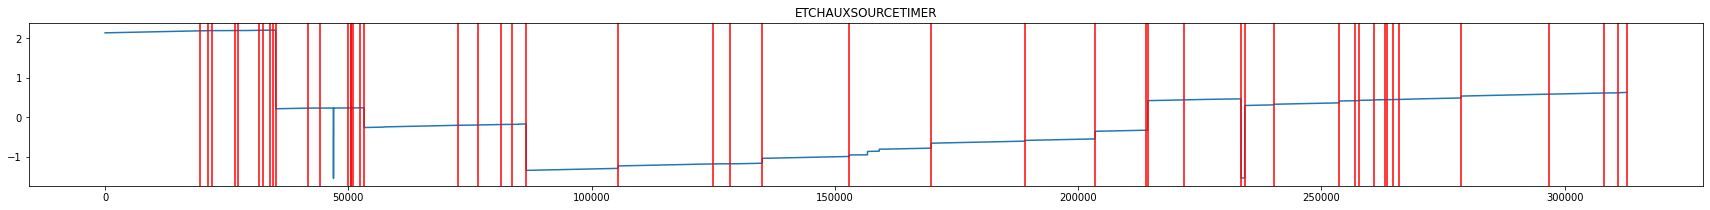

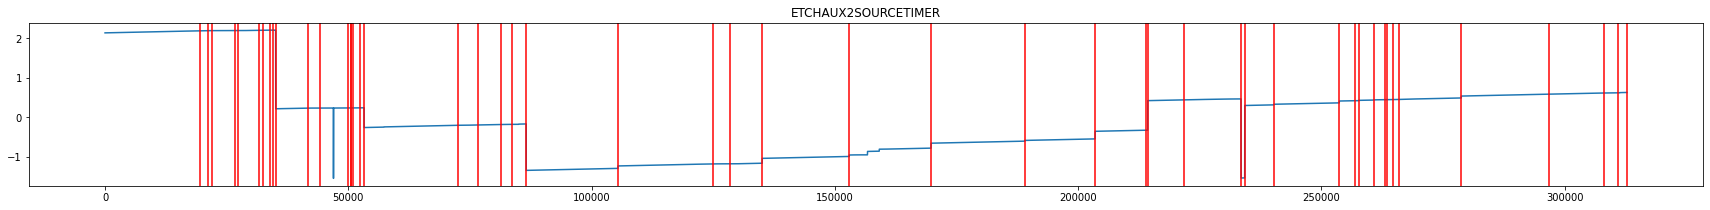

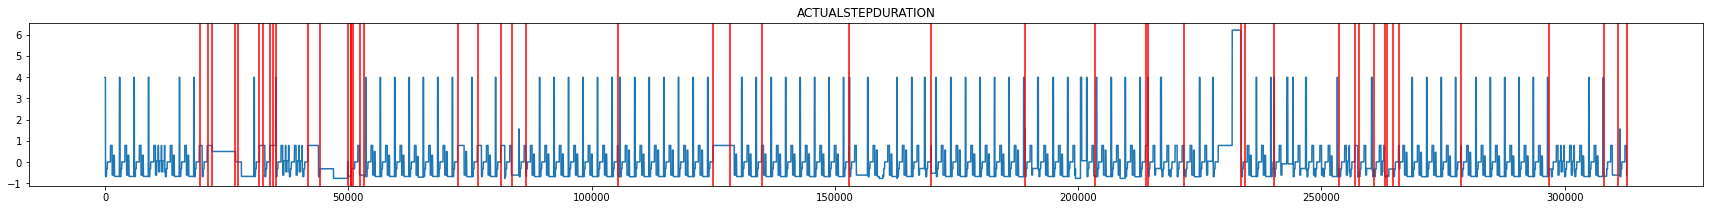

In [ ]:
cols1 = df1_eda_vis.columns.drop('IsFailure')
for column in cols1:
    plt.figure(figsize = (30, 3))
    plt.plot(df1_eda.index, df1_eda_vis[column])
    plt.title(column)
    for ele in np.where(df1_eda_tar == 0)[0]:
        plt.axvline(x = ele, color = 'red')

    plt.show()

## Line Plot for Fault 2

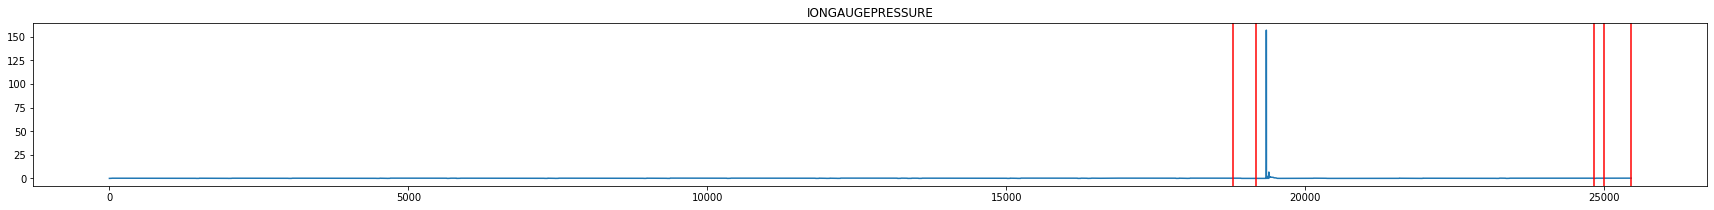

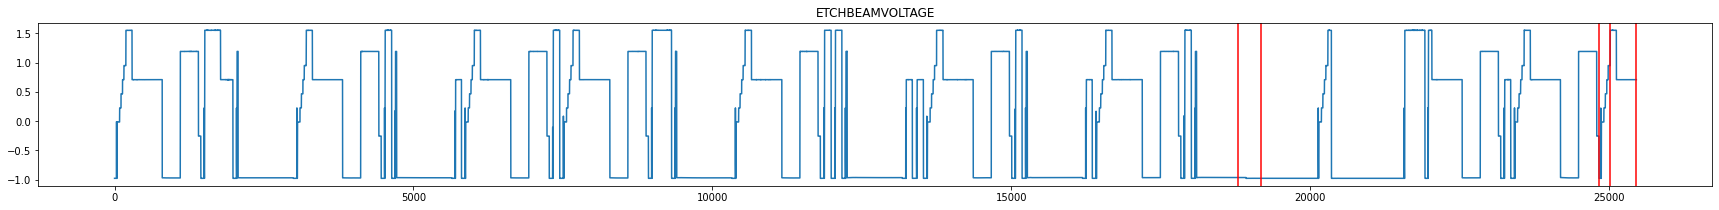

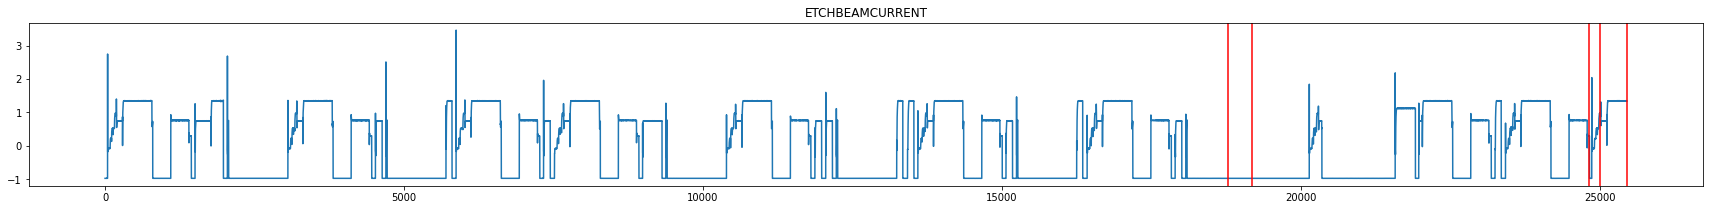

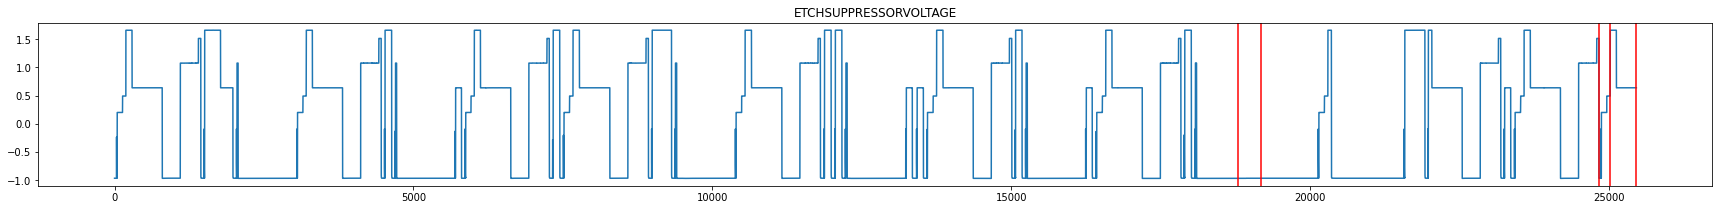

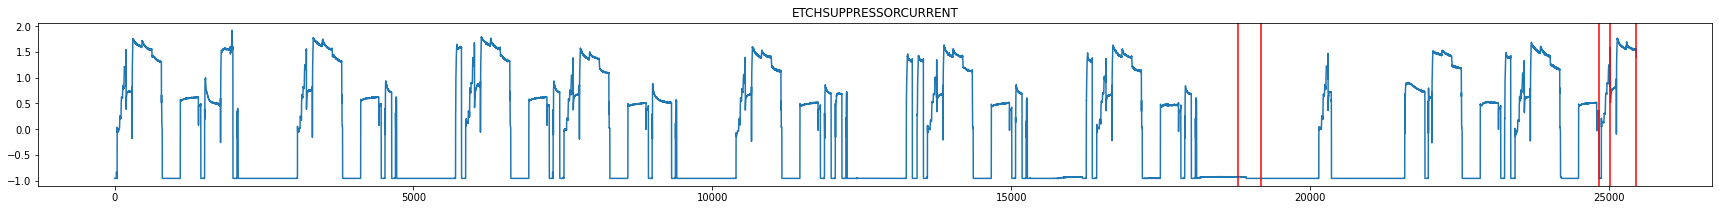

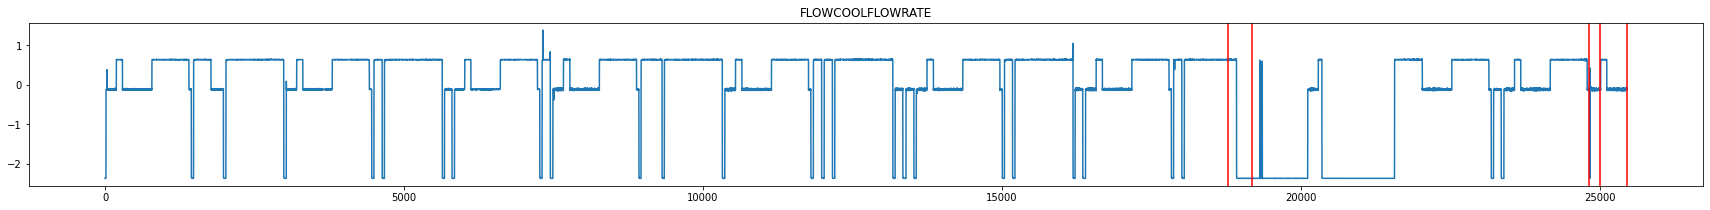

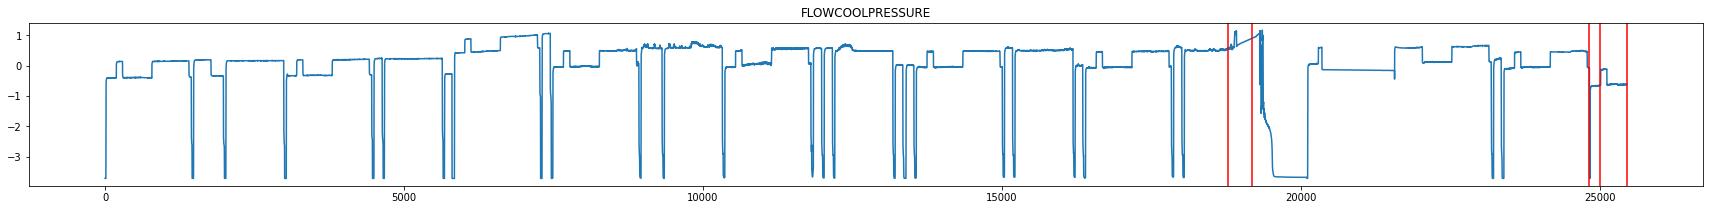

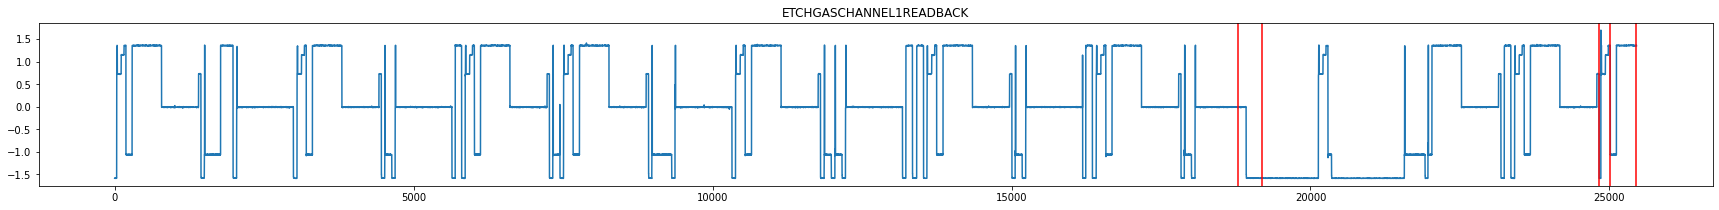

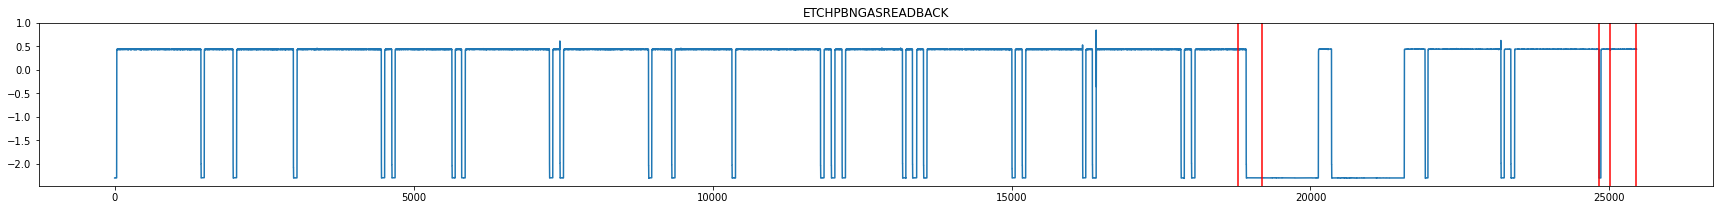

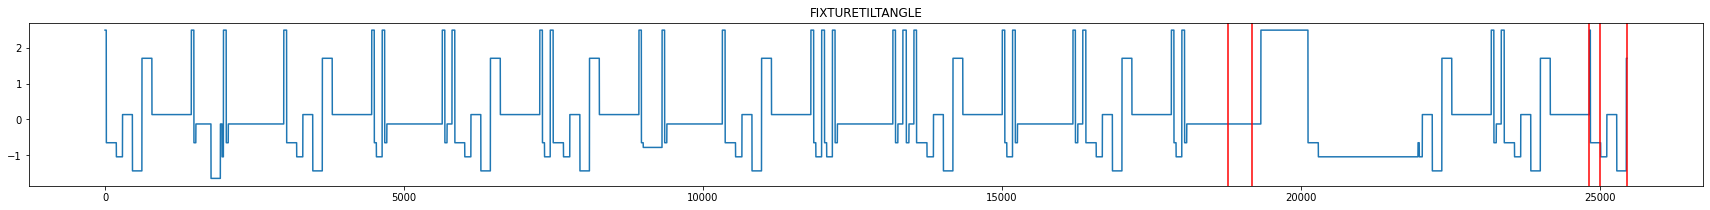

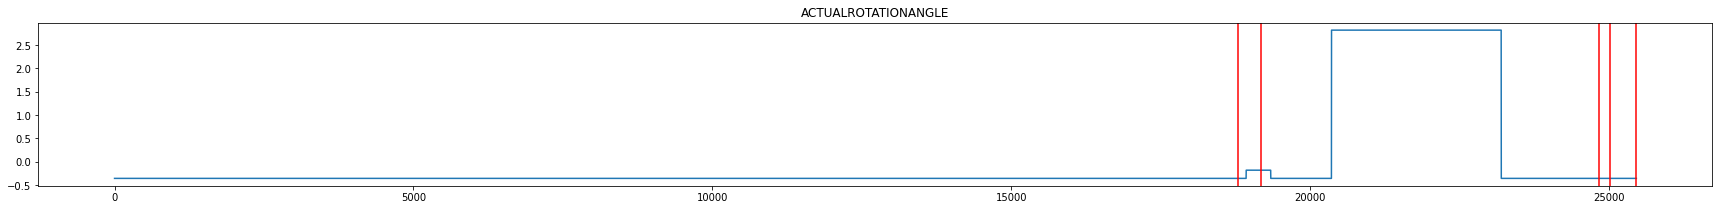

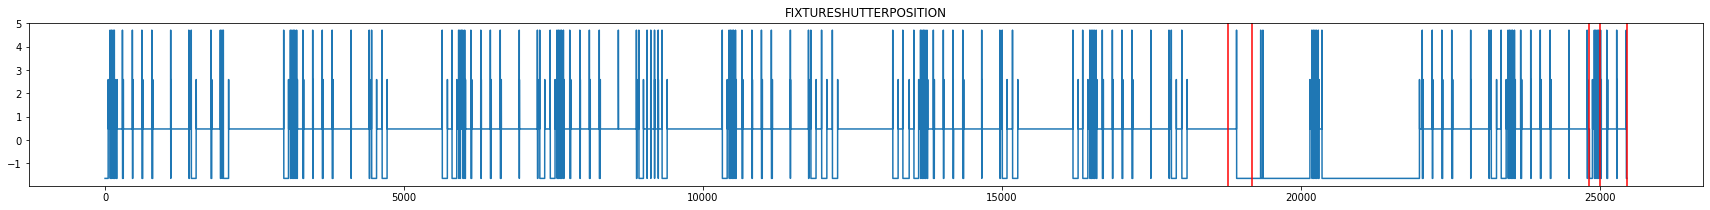

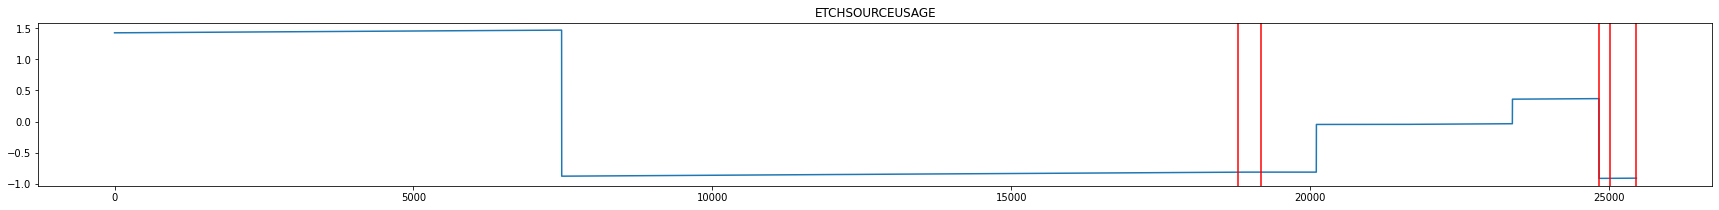

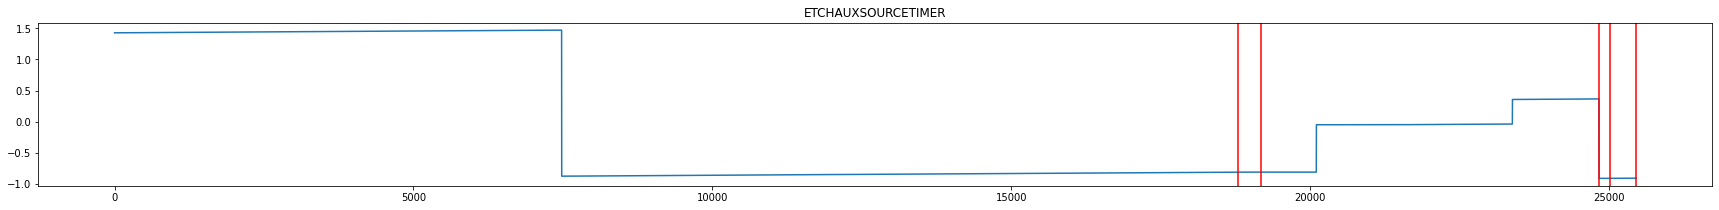

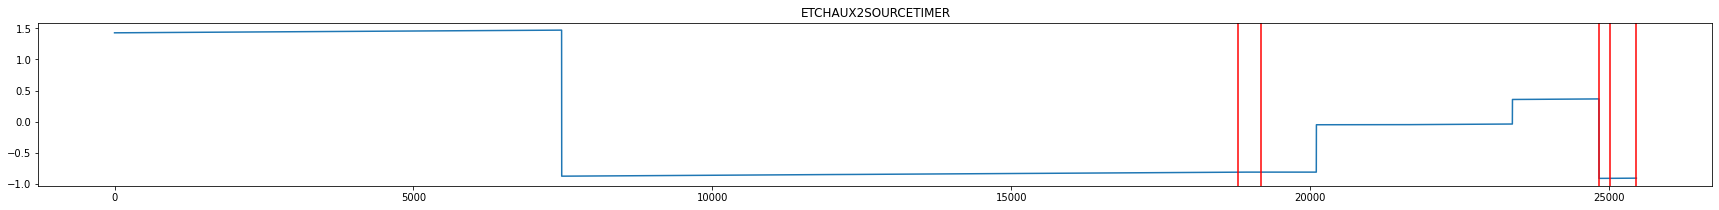

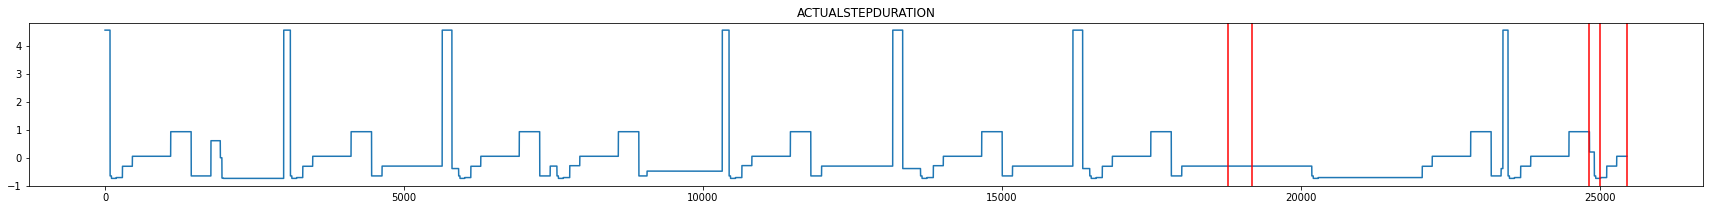

In [ ]:
cols2 = df2_eda_vis.columns.drop('IsFailure')
for column in cols2:
    plt.figure(figsize = (30, 3))
    plt.plot(df2_eda.index, df2_eda_vis[column])
    plt.title(column)
    for ele in np.where(df2_eda_tar == 0)[0]:
        plt.axvline(x = ele, color = 'red')

    plt.show()

## Line Plot for Fault 3

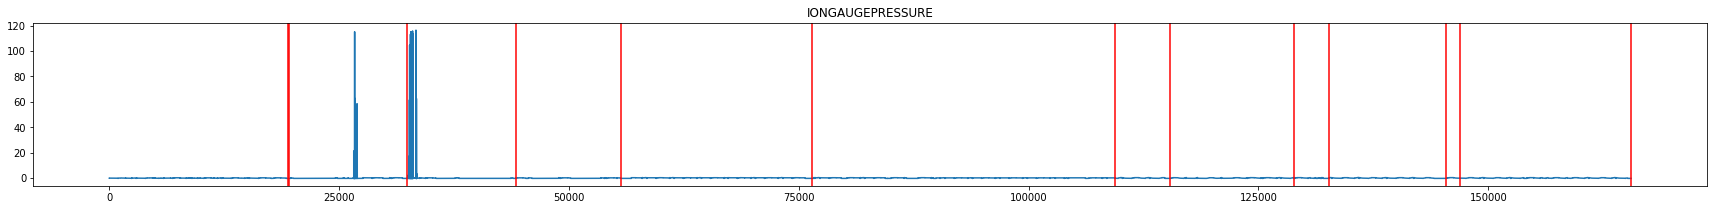

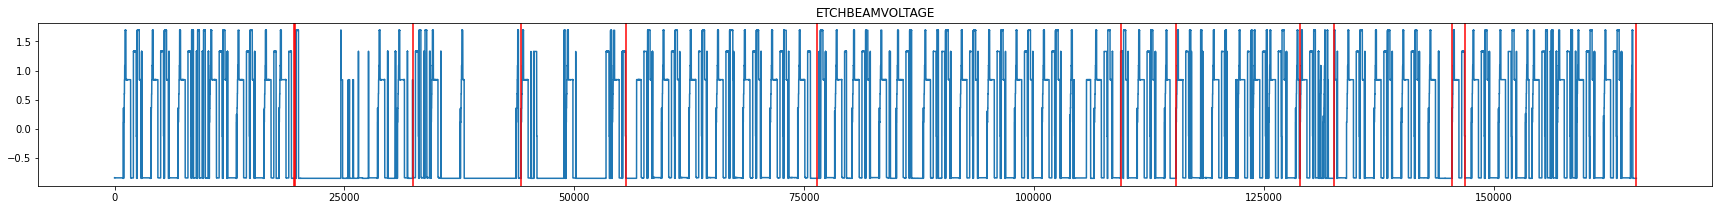

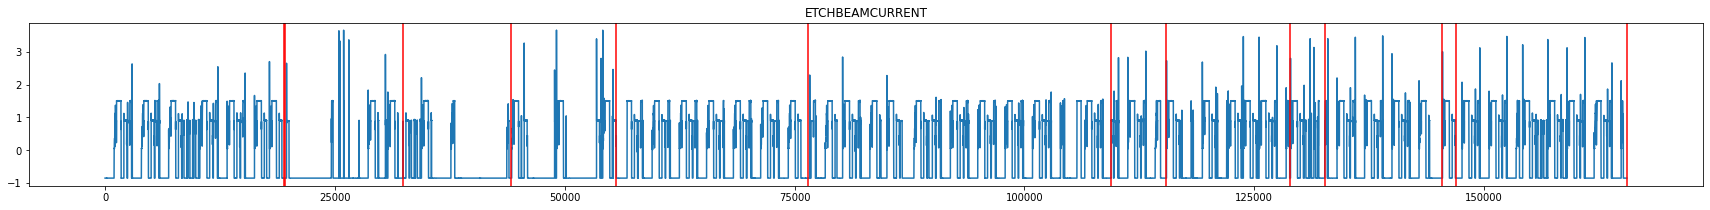

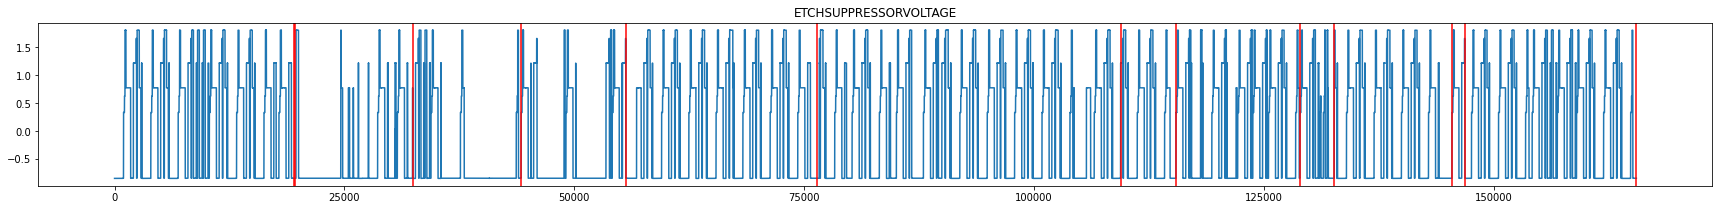

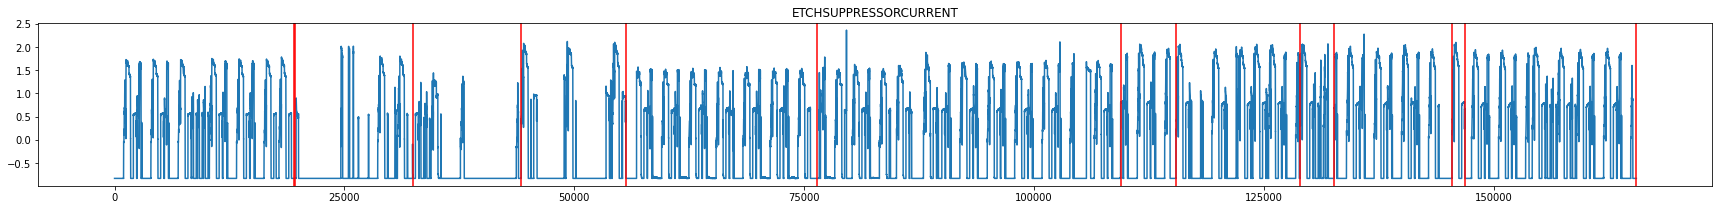

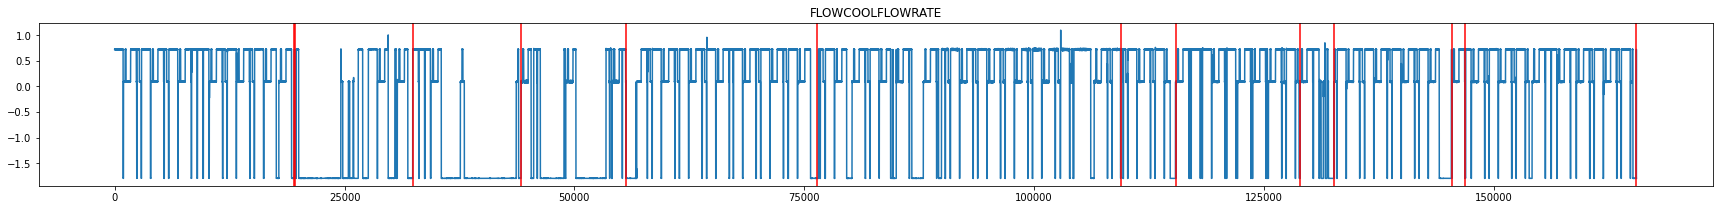

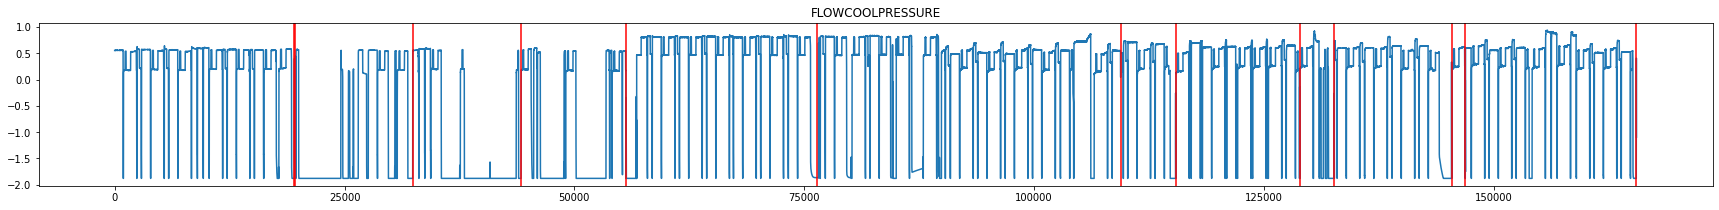

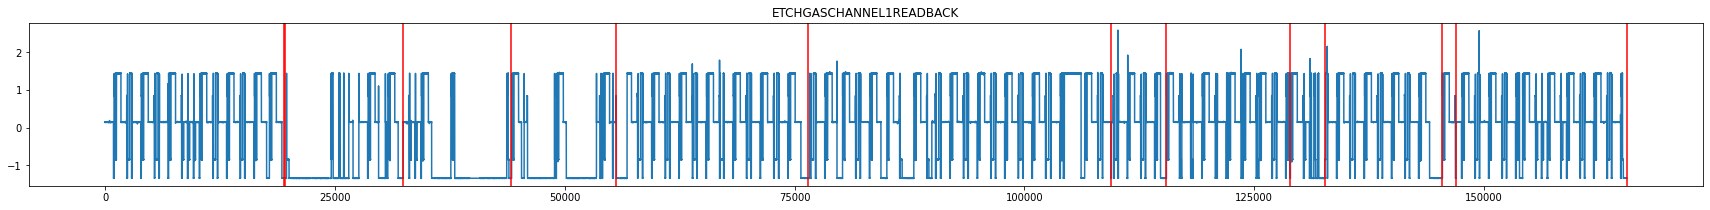

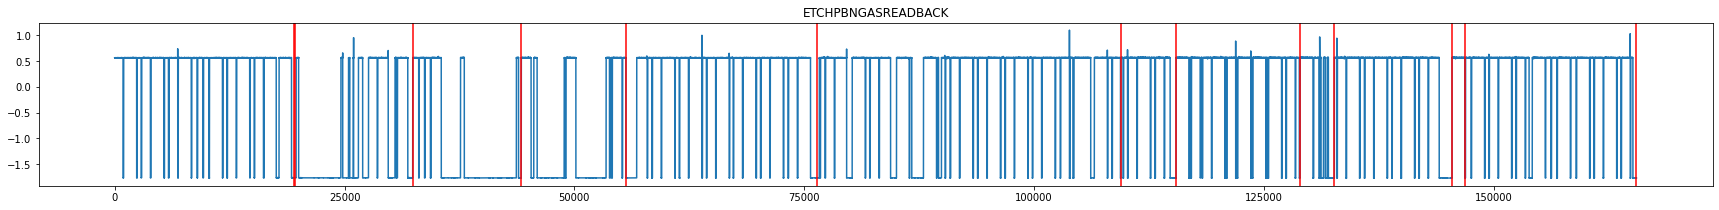

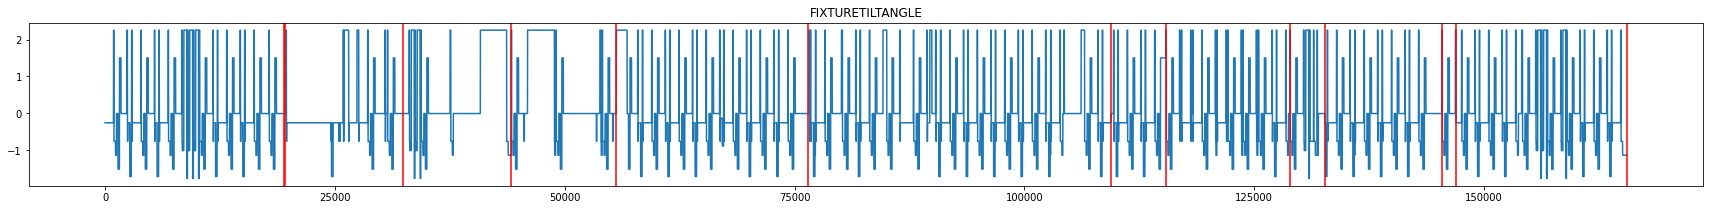

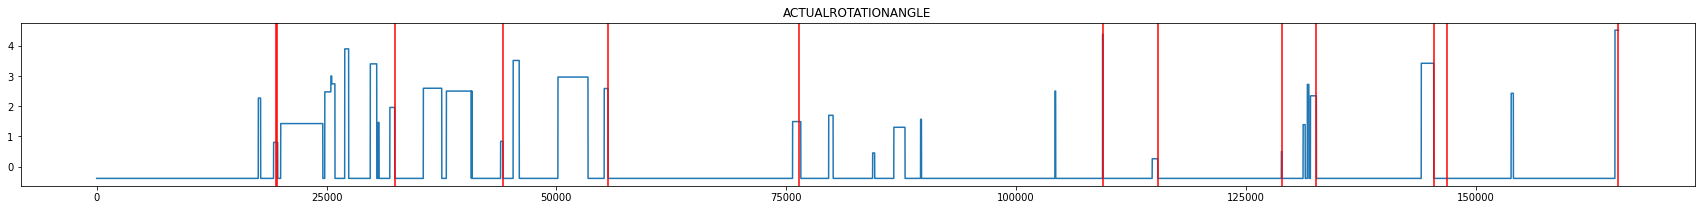

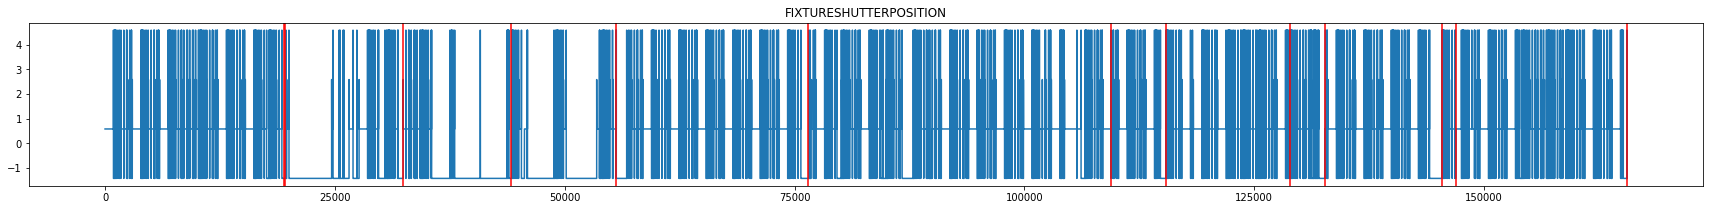

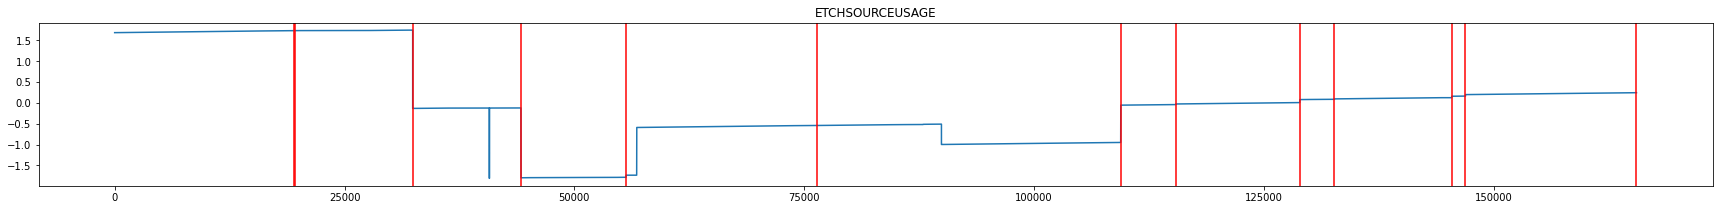

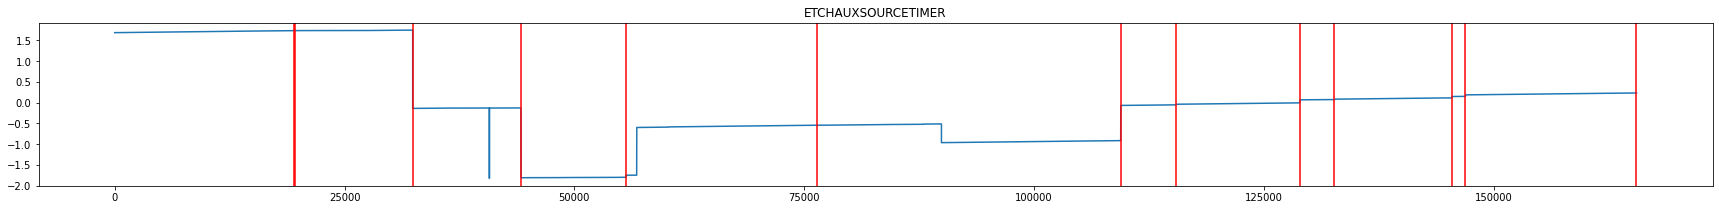

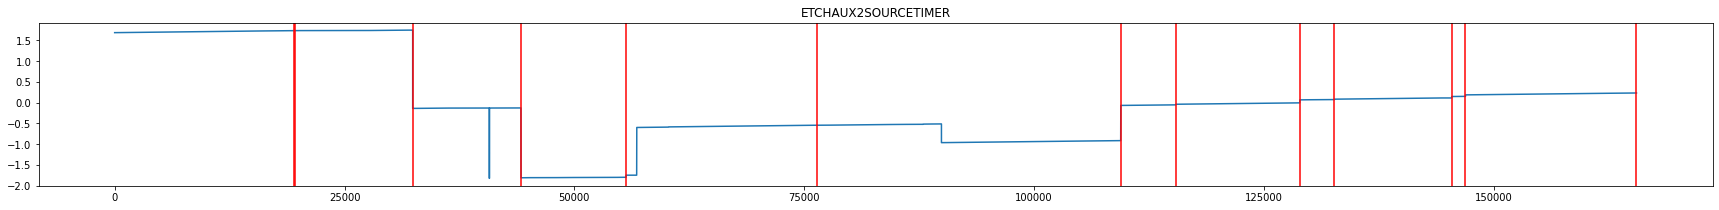

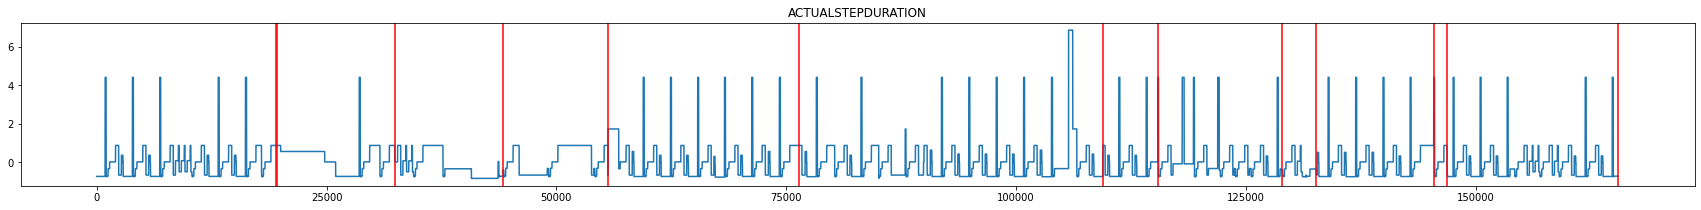

In [ ]:
cols3 = df3_eda_vis.columns.drop('IsFailure')
for column in cols3:
    plt.figure(figsize = (30, 3))
    plt.plot(df3_eda_vis.index, df3_eda_vis[column])
    plt.title(column)
    for ele in np.where(df3_eda_tar == 0)[0]:
        plt.axvline(x = ele, color = 'red')

    plt.show()

## Data Description for Fault 1

In [ ]:
df1_eda_vis.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
IONGAUGEPRESSURE,312762.00000,0.00000,1.00000,-0.32891,-0.16436,0.04288,0.13142,117.90382
ETCHBEAMVOLTAGE,312762.00000,-0.00000,1.00000,-0.93286,-0.92389,-0.91894,0.75535,1.60192
ETCHBEAMCURRENT,312762.00000,-0.00000,1.00000,-0.94003,-0.93183,-0.93105,0.80899,3.54380
ETCHSUPPRESSORVOLTAGE,312762.00000,-0.00000,1.00000,-0.92292,-0.92064,-0.91804,0.68728,1.71206
ETCHSUPPRESSORCURRENT,312762.00000,0.00000,1.00000,-0.90488,-0.90488,-0.89452,0.73608,2.27182
FLOWCOOLFLOWRATE,312762.00000,0.00000,1.00000,-2.27683,-0.09291,0.63442,0.64101,1.25209
FLOWCOOLPRESSURE,312762.00000,0.00000,1.00000,-2.44937,-0.04440,0.34975,0.49780,1.24658
ETCHGASCHANNEL1READBACK,312762.00000,-0.00000,1.00000,-1.57113,-1.04120,0.00866,0.75158,2.85874
ETCHPBNGASREADBACK,312762.00000,0.00000,1.00000,-2.25163,0.44131,0.44789,0.44984,1.19998
FIXTURETILTANGLE,312762.00000,0.00000,1.00000,-1.78695,-0.17662,-0.17662,0.09177,2.50726


## Data Descripton for Fault 2

In [ ]:
df2_eda_vis.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
IONGAUGEPRESSURE,25453.00000,0.00000,1.00002,-0.19295,-0.01517,0.02349,0.03218,157.08431
ETCHBEAMVOLTAGE,25453.00000,-0.00000,1.00002,-0.97684,-0.96770,-0.25356,0.71091,1.55662
ETCHBEAMCURRENT,25453.00000,0.00000,1.00002,-0.97820,-0.97644,-0.08477,0.76242,3.46260
ETCHSUPPRESSORVOLTAGE,25453.00000,0.00000,1.00002,-0.96771,-0.96534,0.20087,0.63874,1.66071
ETCHSUPPRESSORCURRENT,25453.00000,0.00000,1.00002,-0.95810,-0.95810,-0.01096,0.78306,1.92144
FLOWCOOLFLOWRATE,25453.00000,0.00000,1.00002,-2.36772,-0.11759,0.63441,0.64214,1.38936
FLOWCOOLPRESSURE,25453.00000,0.00000,1.00002,-3.72073,-0.05910,0.20424,0.49552,1.16834
ETCHGASCHANNEL1READBACK,25453.00000,-0.00000,1.00002,-1.59126,-1.05964,-0.01059,1.14361,1.69710
ETCHPBNGASREADBACK,25453.00000,0.00000,1.00002,-2.31187,0.43010,0.43483,0.43879,0.84439
FIXTURETILTANGLE,25453.00000,0.00000,1.00002,-1.64052,-0.64825,-0.12600,0.13513,2.48525


## Data Description for Fault 3

In [ ]:
df3_eda_vis.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
IONGAUGEPRESSURE,165535.00000,0.00000,1.00000,-0.29480,-0.24024,0.02217,0.17237,116.37001
ETCHBEAMVOLTAGE,165535.00000,0.00000,1.00000,-0.85566,-0.84905,-0.84356,0.84307,1.69517
ETCHBEAMCURRENT,165535.00000,-0.00000,1.00000,-0.86309,-0.85478,-0.85421,0.90643,3.66324
ETCHSUPPRESSORVOLTAGE,165535.00000,0.00000,1.00000,-0.84738,-0.84504,-0.84415,0.77325,1.80491
ETCHSUPPRESSORCURRENT,165535.00000,0.00000,1.00000,-0.83092,-0.83092,-0.83092,0.79279,2.36536
FLOWCOOLFLOWRATE,165535.00000,0.00000,1.00000,-1.79991,0.08224,0.71488,0.72494,1.10180
FLOWCOOLPRESSURE,165535.00000,0.00000,1.00000,-1.88152,0.17148,0.50474,0.60357,0.94052
ETCHGASCHANNEL1READBACK,165535.00000,0.00000,1.00000,-1.35020,-0.85665,0.14542,0.84102,2.59024
ETCHPBNGASREADBACK,165535.00000,-0.00000,1.00000,-1.77793,0.55736,0.56646,0.56906,1.10429
FIXTURETILTANGLE,165535.00000,-0.00000,1.00000,-1.76780,-0.25831,-0.00673,-0.00673,2.25750


## Heat map for Fault 1

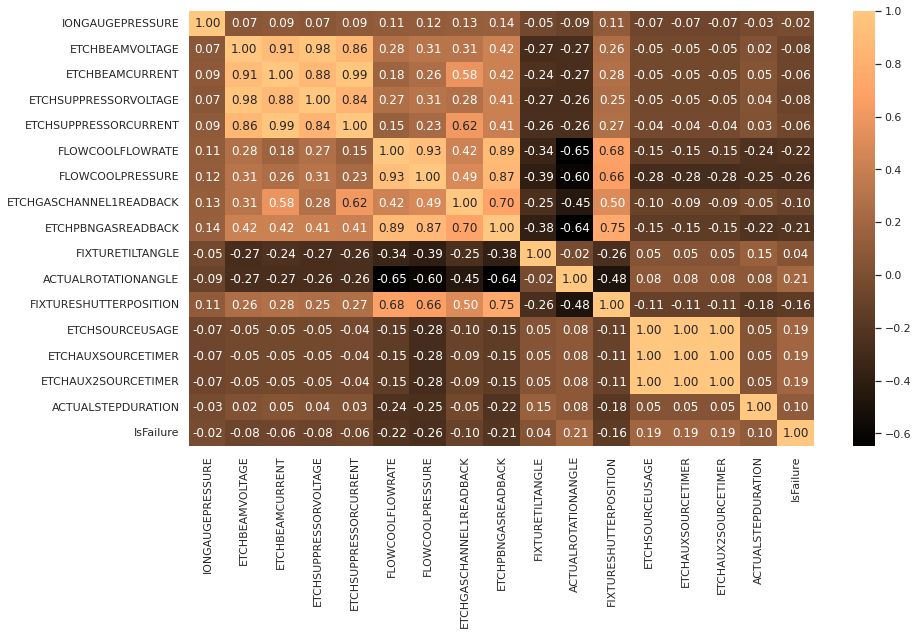

In [ ]:
import seaborn as sns
sns.set()

plt.figure(figsize=(14,8))
sns.heatmap(df1_eda_vis.corr(), annot=True, cmap ='copper', fmt='.2f')
plt.show()

## Heat Map for Fault 2

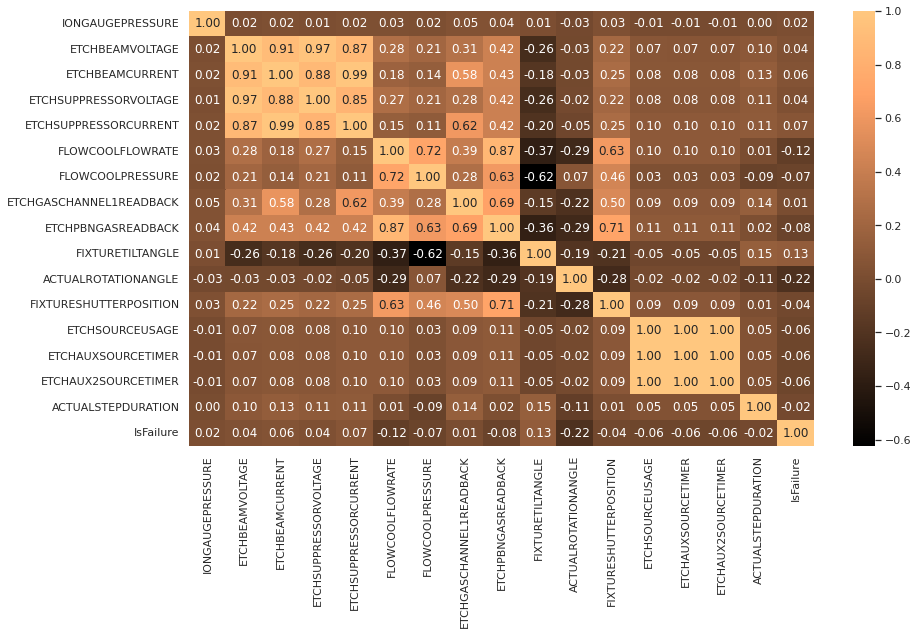

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df2_eda_vis.corr(), annot=True, cmap ='copper', fmt='.2f')
plt.show()

## Heat Map for Fault 3

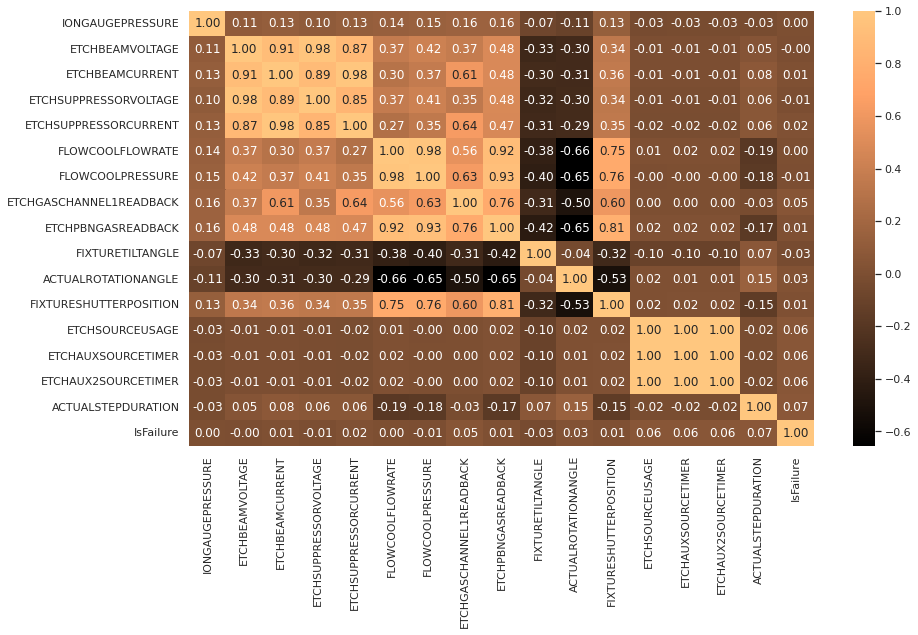

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df3_eda_vis.corr(), annot=True, cmap ='copper', fmt='.2f')
plt.show()